# COVID-19 Literatür Analizi (CORD-19)

## 📌 Proje Amacı

Bu projede, COVID-19 pandemisi sürecinde yayımlanan bilimsel yayınları içeren açık kaynaklı **CORD-19 veri seti** temel alınarak temel düzeyde veri analizi yapılmaktadır.

Amaç; literatürdeki yayınların yıllara göre dağılımını, en çok yayın yapan dergileri ve başlıklarda öne çıkan kavramları incelemektir.

---

## 📁 Kullanılan Veri Seti

**CORD-19 (COVID-19 Open Research Dataset)**  
- Hazırlayan: Allen Institute for AI  
- İçerik: COVID-19 ve ilişkili virüslerle ilgili akademik yayınların meta verileri

🔗 [CORD-19 Veri Seti – Kaggle Linki](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge)

Projede yalnızca `metadata.csv` dosyası kullanılmıştır.

---

In [186]:
# Temel kütüphaneleri ekliyoruz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Grafiklerin hücre içinde görünmesi için ekliyoruz
%matplotlib inline


In [187]:
df = pd.read_csv("metadata.csv", low_memory=False)

# Veri boyutunu kontrol ediyoruz
print("Satır sayısı:", df.shape[0])
print("Sütun sayısı:", df.shape[1])

Satır sayısı: 1056660
Sütun sayısı: 19


In [188]:
# İlk satırları görelim
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [190]:
print("Sütun sayısı:", len(df.columns))
df.columns.tolist()

Sütun sayısı: 19


['cord_uid',
 'sha',
 'source_x',
 'title',
 'doi',
 'pmcid',
 'pubmed_id',
 'license',
 'abstract',
 'publish_time',
 'authors',
 'journal',
 'mag_id',
 'who_covidence_id',
 'arxiv_id',
 'pdf_json_files',
 'pmc_json_files',
 'url',
 's2_id']

In [191]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cord_uid,1056660,970836,kgpo6psq,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sha,373766,373719,31bc0fb718edaab9e33f678909710f62c40abebc,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_x,1056660,49,WHO,450459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,1056157,850366,Reply,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doi,656780,655525,10.1016/j.scitotenv.2020.139397,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pmcid,389571,389571,PMC35282,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pubmed_id,498932,498449,35087663,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
license,1056660,18,unk,601506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abstract,821116,730712,[Figure: see text].,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publish_time,1054846,8056,2021,233709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
# Eksik değer sayısı ve oranını inceleyelim
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

# Tabloya dökelim
missing_df = pd.DataFrame({
    "Eksik Değer Sayısı": missing_count,
    "Eksik (%)": missing_percent.round(2)
})

# Sadece eksik değeri olan sütunları gösteriyoruz
missing_df = missing_df[missing_df["Eksik Değer Sayısı"] > 0].sort_values(by="Eksik (%)", ascending=False)
missing_df

,Eksik Değer Sayısı,Eksik (%)
mag_id,1056660,100.00
arxiv_id,1042411,98.65
pmc_json_files,740918,70.12
sha,682894,64.63
pdf_json_files,682894,64.63
pmcid,667089,63.13
who_covidence_id,573725,54.30
pubmed_id,557728,52.78
doi,399880,37.84
url,369726,34.99


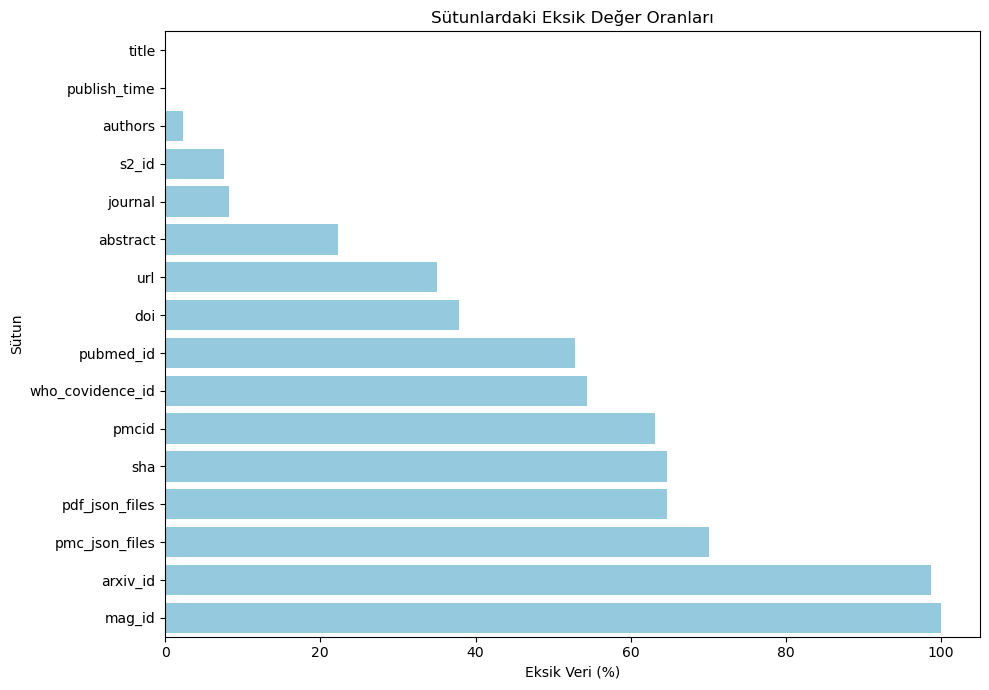

In [193]:
missing_df = pd.DataFrame({
    "Eksik Değer Sayısı": missing_count,
    "Eksik (%)": missing_percent
})

missing_df = missing_df[missing_df["Eksik Değer Sayısı"] > 0].sort_values(by="Eksik (%)", ascending=True)

# Görselleştirme yapıyoruz 
plt.figure(figsize=(10, 7))
sns.barplot(x="Eksik (%)", y=missing_df.index, data=missing_df, color="skyblue")
plt.title("Sütunlardaki Eksik Değer Oranları")
plt.xlabel("Eksik Veri (%)")
plt.ylabel("Sütun")
plt.tight_layout()
plt.show()

In [194]:
# %60 ve üzeri eksik olan sütunları belirle
silinecekler = missing_df[missing_df["Eksik (%)"] >= 60].index.tolist()
print("Silinecek sütunlar:", silinecekler)

# Bu sütunları veriden kaldıralım
df = df.drop(columns=silinecekler)

# Güncel sütun sayısını göster
print("Yeni sütun sayısı:", len(df.columns))

Silinecek sütunlar: ['pmcid', 'sha', 'pdf_json_files', 'pmc_json_files', 'arxiv_id', 'mag_id']
Yeni sütun sayısı: 13


Temel İstatistiksel Özet
CORD-19 veri seti, toplam 1.056.660 satır ve 19 sütundan oluşmaktadır. Sütunların büyük çoğunluğu metinsel verilerdir. describe(include='all') fonksiyonu ile elde edilen temel istatistiksel özet şu şekilde yorumlanabilir:

-- Kimlik ve Tanımlayıcılar
cord_uid: Her yayına ait benzersiz bir kimlik. Tamamı eşsiz (970.386 unique).

sha: PDF metin dosyalarının SHA kodları.

doi, pmcid, pubmed_id: Yayınların DOI ve indeks bilgileri. 

Yayın Bilgileri
source_x: Yayınların kaynağı. 

title: 850.000+ benzersiz başlık içeriyor.

journal: 54.000+ farklı dergi mevcut. En çok geçen dergi: PLoS One.

authors: Yazar bilgisi %97.74 oranında mevcut. En sık geçen yazar: Anonymous.

Tarih ve Lisanslar
publish_time: 2019 sonrası belirgin artış gösteriyor. En eski yayın tarihi 1951.

license: Toplam 18 farklı lisans türü var. 

Metin Verisi
abstract: Özet alanlarının yaklaşık %22’si eksik. 

pdf_json_files / pmc_json_files: Yayın metinlerinin JSON formatındaki yolları. Büyük kısmı eksik.

Diğer Alanlar
mag_id, arxiv_id, s2_id gibi sütunlar çok yüksek oranda eksik. Analize dahil edilmeyecektir.

In [196]:
# publish_time sütununu datetime formatına çeviriyoruz
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Tarihi eksik olanları çıkardık
df_time = df[df['publish_time'].notna()].copy()

df_time['year'] = df_time['publish_time'].dt.year

# Yıllara göre yayın sayısı
yearly_counts = df_time['year'].value_counts().sort_index()
yearly_counts

year
1856         3
1857         1
1860         2
1864         1
1876         1
         ...  
2020    164751
2021    219516
2022     85310
2023         1
2024         1
Name: count, Length: 75, dtype: int64

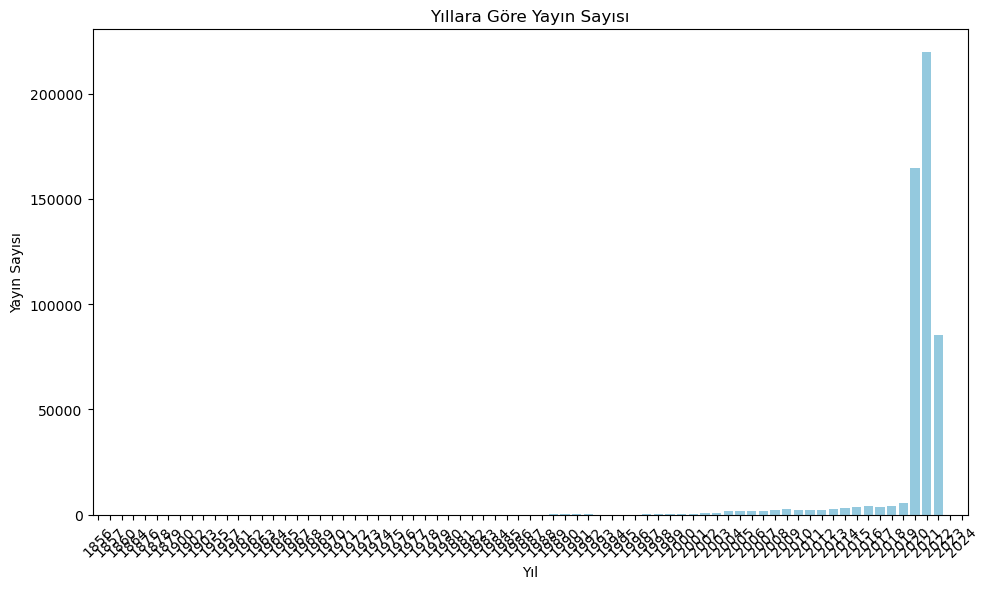

In [197]:
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, color='skyblue')
plt.title("Yıllara Göre Yayın Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Yayın Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


COVID-19 pandemisinin başlangıcı olan 2020 yılı ile birlikte literatürde yayın sayısında büyük bir artış gözlemlenmiştir. Bu artış, 2021 ve 2022 yıllarında da devam etmiş, pandemiye bağlı olarak araştırma yoğunluğu artmıştır.

In [199]:
# journal sütununda eksik olmayanları alıyoruz
df_journal = df[df['journal'].notna()].copy()

# En çok yayın yapan 10 dergiyi görelim
top_journals = df_journal['journal'].value_counts().head(10)
top_journals

journal
PLoS One                           9953
bioRxiv                            8961
Int J Environ Res Public Health    8201
BMJ                                6928
Sci Rep                            5935
Cureus                             4212
Reactions Weekly                   3891
Front Psychol                      3541
BMJ Open                           3515
Front Immunol                      3442
Name: count, dtype: int64

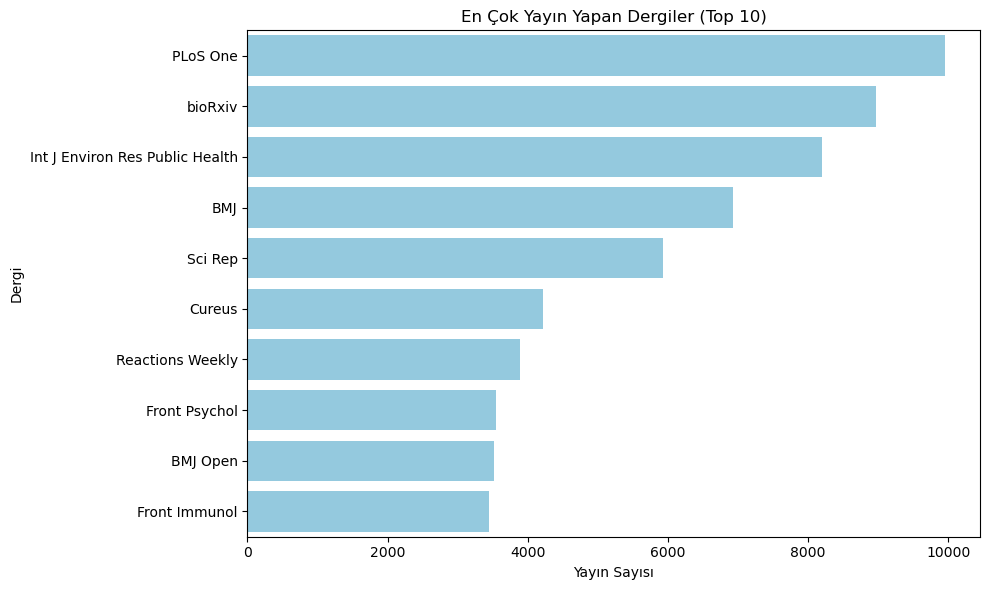

In [200]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_journals.values, y=top_journals.index, color='skyblue')
plt.title("En Çok Yayın Yapan Dergiler (Top 10)")
plt.xlabel("Yayın Sayısı")
plt.ylabel("Dergi")
plt.tight_layout()
plt.show()

CORD-19 veri setindeki yayınların önemli bir kısmı PLoS One, bioRxiv ve International Journal of Environmental Research and Public Health gibi açık erişimli platformlarda yayımlanmıştır. Bu, pandemide bilginin hızlı ve serbest yayılımının önemini göstermektedir.

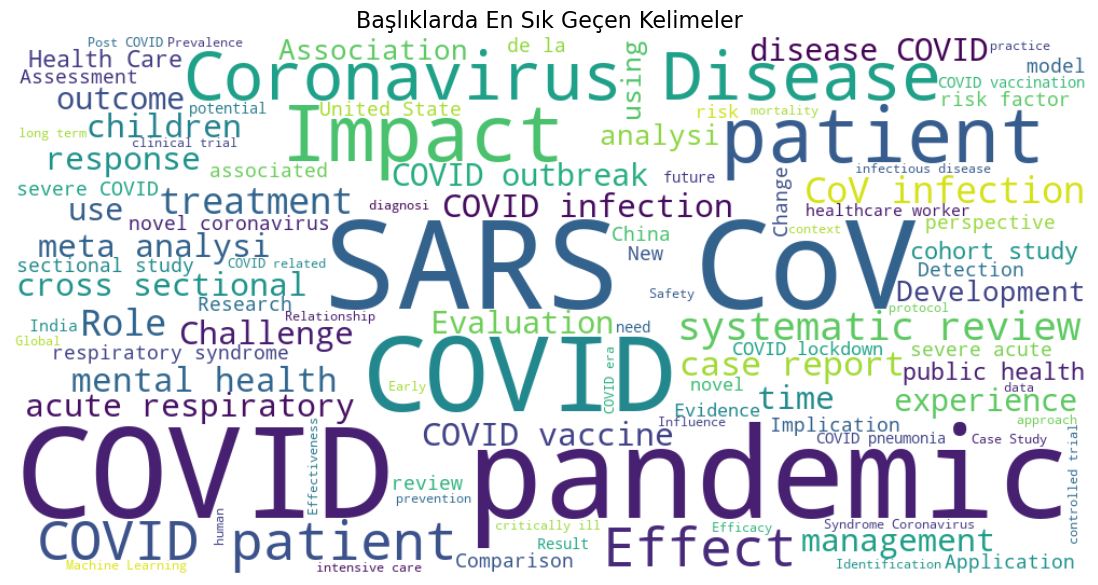

In [202]:
titles = df[df['title'].notna()]['title']

text = ' '.join(titles)

# WordCloud oluşturduk
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    max_words=100
).generate(text)

# Görselleştiriyoruz
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Başlıklarda En Sık Geçen Kelimeler', fontsize=16)
plt.show()

COVID-19 ile ilgili bilimsel yayın başlıklarında en sık geçen kelimeler arasında "covid", "pandemic", "sars", "vaccine", "impact" ve "response" gibi kelimeler yer almaktadır. Bu kelimeler, pandeminin hem tıbbi hem de sosyal yönlerini araştıran çalışmaların yoğunluğunu göstermektedir.

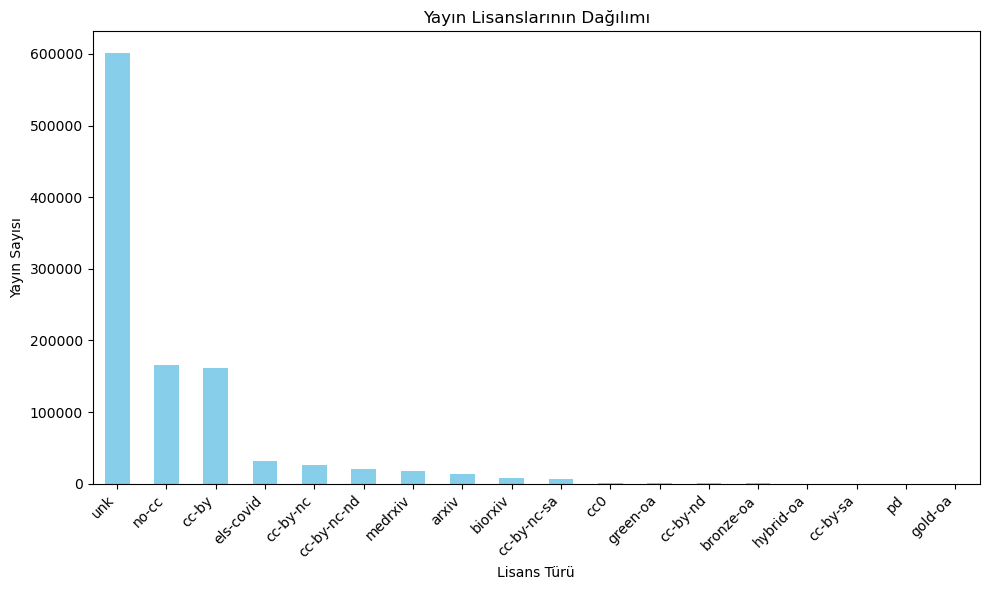

In [204]:
# Eksik olmayan lisans verilerini alıyoruz
df_license = df[df['license'].notna()].copy()

# Lisans tiplerini sayıyoruz
license_counts = df_license['license'].value_counts()

plt.figure(figsize=(10, 6))
license_counts.plot(kind='bar', color='skyblue')
plt.title("Yayın Lisanslarının Dağılımı")
plt.xlabel("Lisans Türü")
plt.ylabel("Yayın Sayısı")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

COVID-19 literatüründe lisans bilgisi çoğu yayında açıkça belirtilmemiştir (unk). Ancak yine de cc-by ve no-cc gibi açık erişimli lisansların yüksek oranda kullanıldığı görülmektedir. Pandemi sürecinde bilimsel veriye erişimin önemi arttığı için açık lisans politikalarının yaygınlaşması dikkat çekicidir.

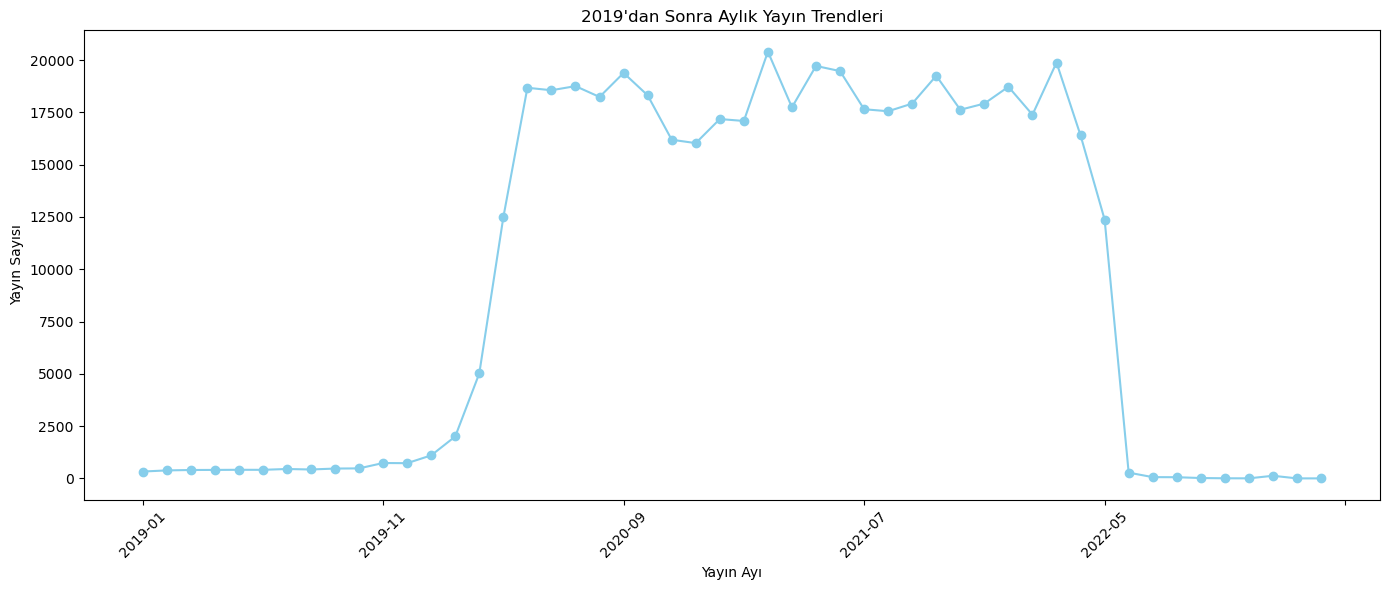

In [206]:
df_time = df[df['publish_time'].notna()].copy()

# 2019 ve sonrası verileri filtreledik
df_time = df_time[df_time['publish_time'].dt.year >= 2019]

df_time['year_month'] = df_time['publish_time'].dt.to_period('M').astype(str)

monthly_counts = df_time['year_month'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='line', marker='o', color='skyblue')
plt.title("2019'dan Sonra Aylık Yayın Trendleri")
plt.xlabel("Yayın Ayı")
plt.ylabel("Yayın Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CORD-19 veri setinde 2019’un sonlarından itibaren yayın sayısında ciddi bir artış gözlemlenmektedir. 2020 yılıyla birlikte COVID-19’un küresel etkisiyle aylık yayınlar 15.000’in üzerine çıkmış ve 2021 yılı boyunca bu yoğunluk korunmuştur. 2022 ortasından itibaren ise yayın sayılarında düşüş başlamıştır. Bu durum, pandeminin bilimsel odak noktası olarak yavaş yavaş geri planda kaldığını veya veri setinin güncelliğini yitirmiş olabileceğini göstermektedir.

Sonuç ve Değerlendirme:

Bu çalışmada, COVID-19 pandemisine ilişkin bilimsel yayınları içeren CORD-19 veri seti temel alınarak çeşitli analizler yapılmıştır. Veri ön işleme, eksik değer analizi, metinsel özetleme ve görselleştirme gibi adımlarla veri daha anlaşılır hâle getirilmiştir.

Temel Bulgular:

Veri Kapsamı: CORD-19, COVID-19 ve ilişkili konularda yayımlanmış 1 milyondan fazla yayını içermektedir. Başlık, özet, yazar, dergi, lisans ve tarih gibi metaveriler mevcuttur.

Eksik Veriler: mag_id, arxiv_id gibi sütunlarda %60’tan fazla eksiklik bulunduğu için bu alanlar analiz dışında bırakılmıştır.

Yayın Trendleri: 2020 başından itibaren yayın sayısında hızlı bir artış gözlenmiştir, bu da pandeminin bilimsel camiada yoğun çalışıldığını göstermektedir.

Dergi Analizi: En çok yayın yapan dergiler arasında bioRxiv, PLoS One ve Int J Environ Res Public Health öne çıkmıştır.

Lisanslar: Yayınların çoğu açık lisanslarla (örneğin CC-BY) yayımlanmıştır; bu da bilgi paylaşımını kolaylaştırmıştır.

Başlık Temaları: Word cloud analizi, sıkça geçen kelimelerin COVID, pandemic, SARS, patient, infection olduğunu göstermiştir.

Genel Değerlendirme:
CORD-19 veri seti, pandemi sürecindeki bilimsel üretkenliği analiz etmek için değerli bir kaynaktır. Bu temel inceleme, ileride yapılacak metin madenciliği ve NLP çalışmalarına sağlam bir zemin sunmaktadır.